In [53]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive

In [54]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train=train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/test1',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')


Mounted at /content/drive
Found 48 images belonging to 10 classes.
Found 20 images belonging to 10 classes.


In [55]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0,2))
model.add(Dense(10,activation='Softmax'))
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
#opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(train,
                  steps_per_epoch=len(train),
                  batch_size = 64,
                  epochs=50,
                  validation_data=test,
                  validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/50
2/2 [==============================] - 7s 5s/step - loss: 26.9320 - accuracy: 0.0833 - val_loss: 22.7313 - val_accuracy: 0.1500
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 19.0183 - accuracy: 0.1250 - val_loss: 6.1188 - val_accuracy: 0.1000
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 3.8251 - accuracy: 0.1042 - val_loss: 2.8134 - val_accuracy: 0.1000
Epoch 4/50
2/2 [==============================] - 2s 985ms/step - loss: 2.5122 - accuracy: 0.1458 - val_loss: 2.2533 - val_accuracy: 0.2000
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 2.2528 - accuracy: 0.1042 - val_loss: 2.2392 - val_accuracy: 0.1500
Epoch 6/50
2/2 [==============================] - 2s 2s/step - loss: 2.2668 - accuracy: 0.1667 - val_loss: 2.2018 - val_accuracy: 0.2000
Epoch 7/50
2/2 [==============================] - 4s 3s/step - loss: 2.0472 - accuracy: 0.3542 - val_loss: 2.0598 - val_accuracy: 0.2000
Epoch 8/50
2/2 [===================

In [57]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  2.5663399696350098
Độ chính xác kiểm tra là:  0.44999998807907104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


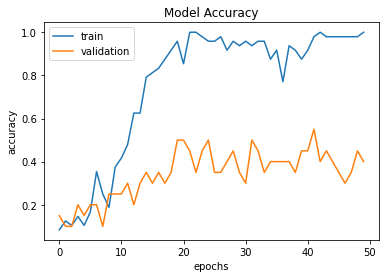

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [59]:
model.save('model_fruit.h5')

In [60]:
from tensorflow.keras.models import load_model
model=load_model('model_fruit.h5')

In [61]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math

In [79]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from google.colab import files 
uploadfile=files.upload()


Saving chuoi.jpg to chuoi (1).jpg


In [64]:
fruit = ['bưởi','cam','chuối','kiwi','mận','mít','nhãn','táo','thanh long','xoài']

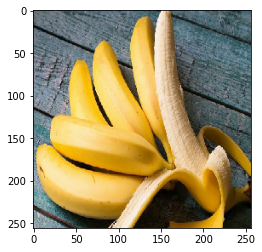

In [80]:
img = load_img("chuoi.jpg",target_size = (256,256))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img=img/255

In [81]:
np.argmax(model.predict(img),axis=1)

array([2])

In [82]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CNNFruit.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-18 07:43:52--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-18 07:43:53 (27.8 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CNNFruit.ipynb to pdf
[NbConvertApp] Support files will be in CNNFruit_files/
[NbConvertApp] Making directory ./CNNFruit_files
[NbConvertApp] Making directory ./CNNFruit_files
[

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'